In [1]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.layers.core import Dense, Dropout, Activation, Reshape
from keras import callbacks


TensorFlow version: 2.2.0


In [2]:
xTemp = np.zeros((636, 6, 340, 444))
with open("C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\DetectionDatasetFinal\\TrainingB_1060-1696.npy", 'rb') as f1:
        xTemp = np.load(f1)


In [3]:
yTemp = np.zeros((636))
for i in range (636):
    if (i%2==0):
        yTemp[i] = 0
    else:
        yTemp[i] = 1


In [4]:
x = np.zeros((636, 6, 340, 444))
y = np.zeros((636))

permutations = np.random.permutation(636)
for i in range (636):
    x[i] = xTemp[permutations[i]]
    y[i] = yTemp[permutations[i]]


In [5]:
x = np.reshape(x, (636, 340, 444, 6))


In [6]:
print (x.shape)


(636, 340, 444, 6)


In [7]:
y = y.astype(int)


In [8]:
print (y[1])


0


In [9]:
img_shape = (340, 444, 6)


In [10]:
img = layers.Input(shape=img_shape)

bn1 = layers.BatchNormalization()(img)
conv1 = layers.Conv2D(64, (5, 5), padding='same', activation='relu', strides=5)(bn1)
maxPooling1 = layers.MaxPooling2D(padding='same')(conv1)

bn2 = layers.BatchNormalization()(maxPooling1)
conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='elu', strides=3)(bn2)
maxPooling2 = layers.MaxPooling2D(padding='same')(conv2)

bn3 = layers.BatchNormalization()(maxPooling2)
conv3 = layers.Conv2D(64, (3, 3), padding='same', activation='elu', strides=3)(bn3)
maxPooling3 = layers.MaxPooling2D(padding='same')(conv3)

bn4 = layers.BatchNormalization()(maxPooling3)
conv4 = layers.Conv2D(128, (3, 3), padding='same', activation='elu', strides=3)(bn4)

flatten = layers.Flatten()(conv4)

dense1 = layers.Dense(128, activation = "relu")(flatten)
drop = layers.Dropout(0.5)(dense1)
res = layers.Dense(1, activation='sigmoid')(drop)

model = Model(img, res)
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [11]:
model.load_weights("Model1TrainingA-V3.hdf5")

In [12]:
history = model.fit(x, y, batch_size = 8, epochs = 10)

Epoch 1/10
80/80 [==============================] - 27s 333ms/step - loss: 0.5833 - accuracy: 0.7280
Epoch 2/10
80/80 [==============================] - 27s 333ms/step - loss: 0.4432 - accuracy: 0.8050
Epoch 3/10
80/80 [==============================] - 27s 333ms/step - loss: 0.4071 - accuracy: 0.8176
Epoch 4/10
80/80 [==============================] - 27s 333ms/step - loss: 0.3271 - accuracy: 0.8569
Epoch 5/10
80/80 [==============================] - 27s 333ms/step - loss: 0.2806 - accuracy: 0.8821
Epoch 6/10
80/80 [==============================] - 27s 335ms/step - loss: 0.2344 - accuracy: 0.9088
Epoch 7/10
80/80 [==============================] - 27s 332ms/step - loss: 0.2090 - accuracy: 0.9245
Epoch 8/10
80/80 [==============================] - 27s 332ms/step - loss: 0.1762 - accuracy: 0.9465
Epoch 9/10
80/80 [==============================] - 26s 330ms/step - loss: 0.1288 - accuracy: 0.9717
Epoch 10/10
80/80 [==============================] - 26s 329ms/step - loss: 0.0960 - accura

In [13]:
model.save_weights("Model1TrainingB-V3.hdf5")

In [14]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 340, 444, 6)]     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 340, 444, 6)       24        
_________________________________________________________________
conv2d (Conv2D)              (None, 68, 89, 64)        9664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 45, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 34, 45, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 15, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 8, 32)          0     

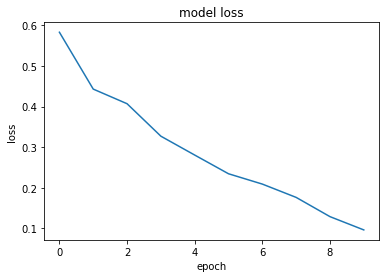

In [16]:
from matplotlib import pyplot as plt
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'])